In [8]:
from helper import *

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU available")

1 Physical GPUs, 1 Logical GPUs


In [10]:
data = pd.read_csv("data.csv")
print(data.shape)

(5572, 7480)


In [11]:
X = data["text_clean"]
X = pd.Series(map(str, X))
y = data["y"]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572,) (5572,)
(4457,) (4457,)
(1115,) (1115,)


In [12]:
MAX_NUM_WORDS = 2000
MAX_SEQUENCE_LENGTH = 100
X_sequence_train , tok = tokenize_text(X_train, MAX_NUM_WORDS, MAX_SEQUENCE_LENGTH)
X_sequence_test = pad_sequences(tok.texts_to_sequences(X_test), maxlen=MAX_SEQUENCE_LENGTH)
print(X_sequence_train.shape, X_sequence_test.shape)

(4457, 100) (1115, 100)


In [13]:
def make_model(name, 
               embedding_dim=128, 
               lstm_units=128, 
               dense_units=64,
               dropout_rate=0.2,
            ):
    model = Sequential(name=name)
    model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim))
    model.add(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
    model.summary()
    return model
        
param_grid = {
        'embedding_dim': [50, 100],
        'lstm_units': [24,32,48],
        'dense_units': [32,64,96],
        'dropout_rate': [0.1,0.2, 0.4],
    }   


In [14]:
# r = grid_search(param_grid, make_model, X_sequence_train , y_train , X_sequence_test , y_test)
r = grid_search(param_grid, make_model, X_sequence_train , y_train , X_sequence_test , y_test, load_dir="models")

Grid size: 54


Model: "Model0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model0


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model0
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model0'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 19, 131]]), 'classification_report': {'0': {'precision': 0.9806910569105691, 'recall': 1.0, 'f1-score': 0.9902514109799897, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8733333333333333, 'f1-score': 0.9323843416370107, 'support': 150.0}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.9903455284552846, 'recall': 0.9366666666666666, 'f1-score': 0.9613178763085002, 'support': 1115.0}, 'weighted avg': {'precision': 0.9832886725728244, 'recall': 0.9829596412556054, 'f1-score': 0.9824666034450599, 'support': 1115.0}}, 'roc_auc': np.float64(0.9366666666666666), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.87333333, 1.        ]), 'history': []}


Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model1


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step
Model: Model1
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model1'}
233409
Metrics: {'confusion_matrix': array([[963,   2],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826530612244898, 'recall': 0.9979274611398964, 'f1-score': 0.9902313624678664, 'support': 965.0}, '1': {'precision': 0.9851851851851852, 'recall': 0.8866666666666667, 'f1-score': 0.9333333333333333, 'support': 150.0}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.9839191232048374, 'recall': 0.9422970639032815, 'f1-score': 0.9617823479005998, 'support': 1115.0}, 'weighted avg': {'precision': 0.9829937057035071, 'recall': 0.9829596412556054, 'f1-score': 0.9825769190865392, 'support': 1115.0}}, 'roc_auc': np.float64(0.9422970639032816), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model2


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model2
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model2'}
123809
Metrics: {'confusion_matrix': array([[963,   2],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856704196519959, 'recall': 0.9979274611398964, 'f1-score': 0.9917610710607621, 'support': 965.0}, '1': {'precision': 0.9855072463768116, 'recall': 0.9066666666666666, 'f1-score': 0.9444444444444444, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9855888330144038, 'recall': 0.9522970639032815, 'f1-score': 0.9681027577526032, 'support': 1115.0}, 'weighted avg': {'precision': 0.9856484680903118, 'recall': 0.9856502242152466, 'f1-score': 0.9853956055966834, 'support': 1115.0}}, 'roc_auc': np.float64(0.9522970639032815), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model3


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step
Model: Model3
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model3'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866939611054247, 'recall': 0.9989637305699481, 'f1-score': 0.9927909371781668, 'support': 965.0}, '1': {'precision': 0.9927536231884058, 'recall': 0.9133333333333333, 'f1-score': 0.9513888888888888, 'support': 150.0}, 'accuracy': 0.9874439461883409, 'macro avg': {'precision': 0.9897237921469153, 'recall': 0.9561485319516407, 'f1-score': 0.9720899130335279, 'support': 1115.0}, 'weighted avg': {'precision': 0.9875091622825074, 'recall': 0.9874439461883409, 'f1-score': 0.9872211548970979, 'support': 1115.0}}, 'roc_auc': np.float64(0.9561485319516407), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model4


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Model: Model4
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model4'}
123809
Metrics: {'confusion_matrix': array([[961,   4],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856410256410256, 'recall': 0.9958549222797928, 'f1-score': 0.9907216494845361, 'support': 965.0}, '1': {'precision': 0.9714285714285714, 'recall': 0.9066666666666666, 'f1-score': 0.9379310344827586, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9785347985347985, 'recall': 0.9512607944732296, 'f1-score': 0.9643263419836474, 'support': 1115.0}, 'weighted avg': {'precision': 0.9837290362850901, 'recall': 0.9838565022421525, 'f1-score': 0.9836197730268978, 'support': 1115.0}}, 'roc_auc': np.float64(0.9512607944732298), 'fpr': array([0.        , 0.00414508, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model5


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step
Model: Model5
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model5'}
233409
Metrics: {'confusion_matrix': array([[961,   4],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866529774127311, 'recall': 0.9958549222797928, 'f1-score': 0.9912325941206808, 'support': 965.0}, '1': {'precision': 0.9716312056737588, 'recall': 0.9133333333333333, 'f1-score': 0.9415807560137457, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9791420915432449, 'recall': 0.954594127806563, 'f1-score': 0.9664066750672132, 'support': 1115.0}, 'weighted avg': {'precision': 0.9846321112595062, 'recall': 0.9847533632286996, 'f1-score': 0.9845529746444116, 'support': 1115.0}}, 'roc_auc': np.float64(0.954594127806563), 'fpr': array([0.        , 0.00414508, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model6


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
Model: Model6
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model6'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816887080366226, 'recall': 1.0, 'f1-score': 0.9907597535934292, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.88, 'f1-score': 0.9361702127659575, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9908443540183113, 'recall': 0.94, 'f1-score': 0.9634649831796933, 'support': 1115.0}, 'weighted avg': {'precision': 0.9841521105429065, 'recall': 0.9838565022421525, 'f1-score': 0.9834158691771774, 'support': 1115.0}}, 'roc_auc': np.float64(0.94), 'fpr': array([0., 0., 1.]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model7


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model7
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model7'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816887080366226, 'recall': 1.0, 'f1-score': 0.9907597535934292, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.88, 'f1-score': 0.9361702127659575, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9908443540183113, 'recall': 0.94, 'f1-score': 0.9634649831796933, 'support': 1115.0}, 'weighted avg': {'precision': 0.9841521105429065, 'recall': 0.9838565022421525, 'f1-score': 0.9834158691771774, 'support': 1115.0}}, 'roc_auc': np.float64(0.94), 'fpr': array([0., 0., 1.]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model8


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
Model: Model8
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model8'}
123809
Metrics: {'confusion_matrix': array([[960,   5],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9825997952917093, 'recall': 0.9948186528497409, 'f1-score': 0.9886714727085479, 'support': 965.0}, '1': {'precision': 0.9637681159420289, 'recall': 0.8866666666666667, 'f1-score': 0.9236111111111112, 'support': 150.0}, 'accuracy': 0.9802690582959641, 'macro avg': {'precision': 0.9731839556168691, 'recall': 0.9407426597582038, 'f1-score': 0.9561412919098295, 'support': 1115.0}, 'weighted avg': {'precision': 0.9800663855137254, 'recall': 0.9802690582959641, 'f1-score': 0.9799189576954399, 'support': 1115.0}}, 'roc_auc': np.float64(0.9407426597582038), 'fpr': array([0.        , 0.00518135, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model9


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model9
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model9'}
233409
Metrics: {'confusion_matrix': array([[963,   2],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9846625766871165, 'recall': 0.9979274611398964, 'f1-score': 0.9912506433350489, 'support': 965.0}, '1': {'precision': 0.9854014598540146, 'recall': 0.9, 'f1-score': 0.9407665505226481, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9850320182705656, 'recall': 0.9489637305699482, 'f1-score': 0.9660085969288486, 'support': 1115.0}, 'weighted avg': {'precision': 0.9847619780100177, 'recall': 0.9847533632286996, 'f1-score': 0.9844590613423492, 'support': 1115.0}}, 'roc_auc': np.float64(0.9489637305699481), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model10


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
Model: Model10
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model10'}
123809
Metrics: {'confusion_matrix': array([[962,   3],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.984646878198567, 'recall': 0.9968911917098445, 'f1-score': 0.9907312049433573, 'support': 965.0}, '1': {'precision': 0.9782608695652174, 'recall': 0.9, 'f1-score': 0.9375, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9814538738818922, 'recall': 0.9484455958549223, 'f1-score': 0.9641156024716786, 'support': 1115.0}, 'weighted avg': {'precision': 0.9837877738981163, 'recall': 0.9838565022421525, 'f1-score': 0.9835700562962689, 'support': 1115.0}}, 'roc_auc': np.float64(0.9484455958549222), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model11


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Model: Model11
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model11'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9846782431052093, 'recall': 0.9989637305699481, 'f1-score': 0.9917695473251029, 'support': 965.0}, '1': {'precision': 0.9926470588235294, 'recall': 0.9, 'f1-score': 0.9440559440559441, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9886626509643694, 'recall': 0.9494818652849741, 'f1-score': 0.9679127456905234, 'support': 1115.0}, 'weighted avg': {'precision': 0.985750281094221, 'recall': 0.9856502242152466, 'f1-score': 0.9853506769301488, 'support': 1115.0}}, 'roc_auc': np.float64(0.949481865284974), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model12


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model12
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model12'}
123809
Metrics: {'confusion_matrix': array([[963,   2],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.981651376146789, 'recall': 0.9979274611398964, 'f1-score': 0.9897225077081192, 'support': 965.0}, '1': {'precision': 0.9850746268656716, 'recall': 0.88, 'f1-score': 0.9295774647887324, 'support': 150.0}, 'accuracy': 0.9820627802690582, 'macro avg': {'precision': 0.9833630015062302, 'recall': 0.9389637305699482, 'f1-score': 0.9596499862484258, 'support': 1115.0}, 'weighted avg': {'precision': 0.9821119031493293, 'recall': 0.9820627802690582, 'f1-score': 0.9816312463288294, 'support': 1115.0}}, 'roc_auc': np.float64(0.9389637305699482), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model13


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step
Model: Model13
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model13'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836901121304791, 'recall': 1.0, 'f1-score': 0.9917780061664954, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8933333333333333, 'f1-score': 0.9436619718309859, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9918450560652395, 'recall': 0.9466666666666667, 'f1-score': 0.9677199889987407, 'support': 1115.0}, 'weighted avg': {'precision': 0.9858842674492486, 'recall': 0.9856502242152466, 'f1-score': 0.9853049970630635, 'support': 1115.0}}, 'roc_auc': np.float64(0.9466666666666667), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model14


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step
Model: Model14
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model14'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816700610997964, 'recall': 0.9989637305699481, 'f1-score': 0.9902413970210581, 'support': 965.0}, '1': {'precision': 0.9924812030075187, 'recall': 0.88, 'f1-score': 0.9328621908127208, 'support': 150.0}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.9870756320536576, 'recall': 0.9394818652849741, 'f1-score': 0.9615517939168894, 'support': 1115.0}, 'weighted avg': {'precision': 0.9831244748093554, 'recall': 0.9829596412556054, 'f1-score': 0.9825222212979634, 'support': 1115.0}}, 'roc_auc': np.float64(0.9394818652849739), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model15


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step
Model: Model15
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model15'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826707441386341, 'recall': 0.9989637305699481, 'f1-score': 0.9907502569373073, 'support': 965.0}, '1': {'precision': 0.9925373134328358, 'recall': 0.8866666666666667, 'f1-score': 0.9366197183098591, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9876040287857349, 'recall': 0.9428151986183074, 'f1-score': 0.9636849876235832, 'support': 1115.0}, 'weighted avg': {'precision': 0.983998085299289, 'recall': 0.9838565022421525, 'f1-score': 0.9834681216959466, 'support': 1115.0}}, 'roc_auc': np.float64(0.9428151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model16


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step
Model: Model16
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model16'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866939611054247, 'recall': 0.9989637305699481, 'f1-score': 0.9927909371781668, 'support': 965.0}, '1': {'precision': 0.9927536231884058, 'recall': 0.9133333333333333, 'f1-score': 0.9513888888888888, 'support': 150.0}, 'accuracy': 0.9874439461883409, 'macro avg': {'precision': 0.9897237921469153, 'recall': 0.9561485319516407, 'f1-score': 0.9720899130335279, 'support': 1115.0}, 'weighted avg': {'precision': 0.9875091622825074, 'recall': 0.9874439461883409, 'f1-score': 0.9872211548970979, 'support': 1115.0}}, 'roc_auc': np.float64(0.9561485319516407), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model17


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Model: Model17
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model17'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836734693877551, 'recall': 0.9989637305699481, 'f1-score': 0.9912596401028277, 'support': 965.0}, '1': {'precision': 0.9925925925925926, 'recall': 0.8933333333333333, 'f1-score': 0.9403508771929825, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9881330309901739, 'recall': 0.9461485319516407, 'f1-score': 0.9658052586479051, 'support': 1115.0}, 'weighted avg': {'precision': 0.984873351433249, 'recall': 0.9847533632286996, 'f1-score': 0.9844109276037455, 'support': 1115.0}}, 'roc_auc': np.float64(0.9461485319516407), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model18


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

IOStream.flush timed out


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step
Model: Model18
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model18'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856850715746421, 'recall': 0.9989637305699481, 'f1-score': 0.9922799794132784, 'support': 965.0}, '1': {'precision': 0.9927007299270073, 'recall': 0.9066666666666666, 'f1-score': 0.9477351916376306, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9891929007508247, 'recall': 0.9528151986183073, 'f1-score': 0.9700075855254545, 'support': 1115.0}, 'weighted avg': {'precision': 0.986628882115319, 'recall': 0.9865470852017937, 'f1-score': 0.9862874070667786, 'support': 1115.0}}, 'roc_auc': np.float64(0.9528151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model19


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step
Model: Model19
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model19'}
233409
Metrics: {'confusion_matrix': array([[962,   3],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.985655737704918, 'recall': 0.9968911917098445, 'f1-score': 0.9912416280267903, 'support': 965.0}, '1': {'precision': 0.9784172661870504, 'recall': 0.9066666666666666, 'f1-score': 0.9411764705882353, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9820365019459842, 'recall': 0.9517789291882556, 'f1-score': 0.9662090493075128, 'support': 1115.0}, 'weighted avg': {'precision': 0.9846819522989269, 'recall': 0.9847533632286996, 'f1-score': 0.9845064050529936, 'support': 1115.0}}, 'roc_auc': np.float64(0.9517789291882556), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model20


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
Model: Model20
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model20'}
123809
Metrics: {'confusion_matrix': array([[962,   3],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.982635342185904, 'recall': 0.9968911917098445, 'f1-score': 0.9897119341563786, 'support': 965.0}, '1': {'precision': 0.9779411764705882, 'recall': 0.8866666666666667, 'f1-score': 0.9300699300699301, 'support': 150.0}, 'accuracy': 0.9820627802690582, 'macro avg': {'precision': 0.980288259328246, 'recall': 0.9417789291882557, 'f1-score': 0.9598909321131543, 'support': 1115.0}, 'weighted avg': {'precision': 0.9820038400717359, 'recall': 0.9820627802690582, 'f1-score': 0.9816883461626861, 'support': 1115.0}}, 'roc_auc': np.float64(0.9417789291882557), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model21


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step 
Model: Model21
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model21'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856850715746421, 'recall': 0.9989637305699481, 'f1-score': 0.9922799794132784, 'support': 965.0}, '1': {'precision': 0.9927007299270073, 'recall': 0.9066666666666666, 'f1-score': 0.9477351916376306, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9891929007508247, 'recall': 0.9528151986183073, 'f1-score': 0.9700075855254545, 'support': 1115.0}, 'weighted avg': {'precision': 0.986628882115319, 'recall': 0.9865470852017937, 'f1-score': 0.9862874070667786, 'support': 1115.0}}, 'roc_auc': np.float64(0.9528151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded model: Model22
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 993ms/step
Model: Model22
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model22'}
123809
Metrics: {'confusion_matrix': array([[963,   2],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836567926455567, 'recall': 0.9979274611398964, 'f1-score': 0.9907407407407407, 'support': 965.0}, '1': {'precision': 0.9852941176470589, 'recall': 0.8933333333333333, 'f1-score': 0.9370629370629371, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9844754551463077, 'recall': 0.9456303972366149, 'f1-score': 0.9639018389018389, 'support': 1115.0}, 'weighted avg': {'precision': 0.9838770605829786, 'recall': 0.9838565022421525, 'f1-score': 0.9835195115464174, 'support': 1115.0}}, 'roc_auc': np.float64(0.9456303972366149), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model23


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step
Model: Model23
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model23'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836901121304791, 'recall': 1.0, 'f1-score': 0.9917780061664954, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8933333333333333, 'f1-score': 0.9436619718309859, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9918450560652395, 'recall': 0.9466666666666667, 'f1-score': 0.9677199889987407, 'support': 1115.0}, 'weighted avg': {'precision': 0.9858842674492486, 'recall': 0.9856502242152466, 'f1-score': 0.9853049970630635, 'support': 1115.0}}, 'roc_auc': np.float64(0.9466666666666667), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model24


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Model: Model24
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model24'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826883910386965, 'recall': 1.0, 'f1-score': 0.9912686183872624, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8866666666666667, 'f1-score': 0.9399293286219081, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9913441955193483, 'recall': 0.9433333333333334, 'f1-score': 0.9655989735045853, 'support': 1115.0}, 'weighted avg': {'precision': 0.9850173070424594, 'recall': 0.9847533632286996, 'f1-score': 0.9843619874771251, 'support': 1115.0}}, 'roc_auc': np.float64(0.9433333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model25


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Model: Model25
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model25'}
233409
Metrics: {'confusion_matrix': array([[963,   2],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866803278688525, 'recall': 0.9979274611398964, 'f1-score': 0.9922720247295209, 'support': 965.0}, '1': {'precision': 0.9856115107913669, 'recall': 0.9133333333333333, 'f1-score': 0.9480968858131488, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9861459193301096, 'recall': 0.9556303972366149, 'f1-score': 0.9701844552713348, 'support': 1115.0}, 'weighted avg': {'precision': 0.9865365408180696, 'recall': 0.9865470852017937, 'f1-score': 0.986329180929112, 'support': 1115.0}}, 'roc_auc': np.float64(0.9556303972366149), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model26


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step
Model: Model26
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model26'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826883910386965, 'recall': 1.0, 'f1-score': 0.9912686183872624, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8866666666666667, 'f1-score': 0.9399293286219081, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9913441955193483, 'recall': 0.9433333333333334, 'f1-score': 0.9655989735045853, 'support': 1115.0}, 'weighted avg': {'precision': 0.9850173070424594, 'recall': 0.9847533632286996, 'f1-score': 0.9843619874771251, 'support': 1115.0}}, 'roc_auc': np.float64(0.9433333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model27


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step
Model: Model27
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model27'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816700610997964, 'recall': 0.9989637305699481, 'f1-score': 0.9902413970210581, 'support': 965.0}, '1': {'precision': 0.9924812030075187, 'recall': 0.88, 'f1-score': 0.9328621908127208, 'support': 150.0}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.9870756320536576, 'recall': 0.9394818652849741, 'f1-score': 0.9615517939168894, 'support': 1115.0}, 'weighted avg': {'precision': 0.9831244748093554, 'recall': 0.9829596412556054, 'f1-score': 0.9825222212979634, 'support': 1115.0}}, 'roc_auc': np.float64(0.9394818652849739), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model28


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step
Model: Model28
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model28'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856996935648621, 'recall': 1.0, 'f1-score': 0.992798353909465, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.9066666666666666, 'f1-score': 0.951048951048951, 'support': 150.0}, 'accuracy': 0.9874439461883409, 'macro avg': {'precision': 0.992849846782431, 'recall': 0.9533333333333334, 'f1-score': 0.9719236524792081, 'support': 1115.0}, 'weighted avg': {'precision': 0.9876235016054636, 'recall': 0.9874439461883409, 'f1-score': 0.9871818423138803, 'support': 1115.0}}, 'roc_auc': np.float64(0.9533333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model29


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step
Model: Model29
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model29'}
233409
Metrics: {'confusion_matrix': array([[961,   4],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866529774127311, 'recall': 0.9958549222797928, 'f1-score': 0.9912325941206808, 'support': 965.0}, '1': {'precision': 0.9716312056737588, 'recall': 0.9133333333333333, 'f1-score': 0.9415807560137457, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9791420915432449, 'recall': 0.954594127806563, 'f1-score': 0.9664066750672132, 'support': 1115.0}, 'weighted avg': {'precision': 0.9846321112595062, 'recall': 0.9847533632286996, 'f1-score': 0.9845529746444116, 'support': 1115.0}}, 'roc_auc': np.float64(0.954594127806563), 'fpr': array([0.        , 0.00414508, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model30


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step
Model: Model30
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model30'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826883910386965, 'recall': 1.0, 'f1-score': 0.9912686183872624, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8866666666666667, 'f1-score': 0.9399293286219081, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9913441955193483, 'recall': 0.9433333333333334, 'f1-score': 0.9655989735045853, 'support': 1115.0}, 'weighted avg': {'precision': 0.9850173070424594, 'recall': 0.9847533632286996, 'f1-score': 0.9843619874771251, 'support': 1115.0}}, 'roc_auc': np.float64(0.9433333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model31


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step
Model: Model31
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model31'}
233409
Metrics: {'confusion_matrix': array([[962,   3],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816326530612245, 'recall': 0.9968911917098445, 'f1-score': 0.9892030848329049, 'support': 965.0}, '1': {'precision': 0.9777777777777777, 'recall': 0.88, 'f1-score': 0.9263157894736842, 'support': 150.0}, 'accuracy': 0.9811659192825112, 'macro avg': {'precision': 0.9797052154195012, 'recall': 0.9384455958549223, 'f1-score': 0.9577594371532945, 'support': 1115.0}, 'weighted avg': {'precision': 0.9811140599737654, 'recall': 0.9811659192825112, 'f1-score': 0.9807429105693327, 'support': 1115.0}}, 'roc_auc': np.float64(0.9384455958549222), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model32


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
Model: Model32
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model32'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9846938775510204, 'recall': 1.0, 'f1-score': 0.9922879177377892, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526315, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9923469387755102, 'recall': 0.95, 'f1-score': 0.9698281693952104, 'support': 1115.0}, 'weighted avg': {'precision': 0.9867529971629908, 'recall': 0.9865470852017937, 'f1-score': 0.9862449361209519, 'support': 1115.0}}, 'roc_auc': np.float64(0.95), 'fpr': array([0., 0., 1.]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_37 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model33


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step
Model: Model33
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model33'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 18, 132]]), 'classification_report': {'0': {'precision': 0.9816887080366226, 'recall': 1.0, 'f1-score': 0.9907597535934292, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.88, 'f1-score': 0.9361702127659575, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9908443540183113, 'recall': 0.94, 'f1-score': 0.9634649831796933, 'support': 1115.0}, 'weighted avg': {'precision': 0.9841521105429065, 'recall': 0.9838565022421525, 'f1-score': 0.9834158691771774, 'support': 1115.0}}, 'roc_auc': np.float64(0.94), 'fpr': array([0., 0., 1.]), 'tpr': array([0.  , 0.88, 1.  ]), 'history': []}


Model: "Model34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model34


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
Model: Model34
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model34'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 19, 131]]), 'classification_report': {'0': {'precision': 0.9806910569105691, 'recall': 1.0, 'f1-score': 0.9902514109799897, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8733333333333333, 'f1-score': 0.9323843416370107, 'support': 150.0}, 'accuracy': 0.9829596412556054, 'macro avg': {'precision': 0.9903455284552846, 'recall': 0.9366666666666666, 'f1-score': 0.9613178763085002, 'support': 1115.0}, 'weighted avg': {'precision': 0.9832886725728244, 'recall': 0.9829596412556054, 'f1-score': 0.9824666034450599, 'support': 1115.0}}, 'roc_auc': np.float64(0.9366666666666666), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.87333333, 1.        ]), 'history': []}


Model: "Model35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_39 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model35


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step
Model: Model35
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model35'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856850715746421, 'recall': 0.9989637305699481, 'f1-score': 0.9922799794132784, 'support': 965.0}, '1': {'precision': 0.9927007299270073, 'recall': 0.9066666666666666, 'f1-score': 0.9477351916376306, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9891929007508247, 'recall': 0.9528151986183073, 'f1-score': 0.9700075855254545, 'support': 1115.0}, 'weighted avg': {'precision': 0.986628882115319, 'recall': 0.9865470852017937, 'f1-score': 0.9862874070667786, 'support': 1115.0}}, 'roc_auc': np.float64(0.9528151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_40 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model36


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model36
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model36'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836734693877551, 'recall': 0.9989637305699481, 'f1-score': 0.9912596401028277, 'support': 965.0}, '1': {'precision': 0.9925925925925926, 'recall': 0.8933333333333333, 'f1-score': 0.9403508771929825, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9881330309901739, 'recall': 0.9461485319516407, 'f1-score': 0.9658052586479051, 'support': 1115.0}, 'weighted avg': {'precision': 0.984873351433249, 'recall': 0.9847533632286996, 'f1-score': 0.9844109276037455, 'support': 1115.0}}, 'roc_auc': np.float64(0.9461485319516407), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_41 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model37


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step
Model: Model37
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model37'}
233409
Metrics: {'confusion_matrix': array([[959,   6],
       [ 12, 138]]), 'classification_report': {'0': {'precision': 0.9876416065911432, 'recall': 0.9937823834196892, 'f1-score': 0.9907024793388429, 'support': 965.0}, '1': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9729874699622383, 'recall': 0.9568911917098446, 'f1-score': 0.9647389947714623, 'support': 1115.0}, 'weighted avg': {'precision': 0.9836987895609445, 'recall': 0.9838565022421525, 'f1-score': 0.9837167884238527, 'support': 1115.0}}, 'roc_auc': np.float64(0.9568911917098446), 'fpr': array([0.        , 0.00621762, 1.        ]), 'tpr': array([0.  , 0.92, 1.  ]), 'history': []}


Model: "Model38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_42 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model38


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model38
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model38'}
123809
Metrics: {'confusion_matrix': array([[962,   3],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.985655737704918, 'recall': 0.9968911917098445, 'f1-score': 0.9912416280267903, 'support': 965.0}, '1': {'precision': 0.9784172661870504, 'recall': 0.9066666666666666, 'f1-score': 0.9411764705882353, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9820365019459842, 'recall': 0.9517789291882556, 'f1-score': 0.9662090493075128, 'support': 1115.0}, 'weighted avg': {'precision': 0.9846819522989269, 'recall': 0.9847533632286996, 'f1-score': 0.9845064050529936, 'support': 1115.0}}, 'roc_auc': np.float64(0.9517789291882556), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_43 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model39


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model39
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model39'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826883910386965, 'recall': 1.0, 'f1-score': 0.9912686183872624, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8866666666666667, 'f1-score': 0.9399293286219081, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9913441955193483, 'recall': 0.9433333333333334, 'f1-score': 0.9655989735045853, 'support': 1115.0}, 'weighted avg': {'precision': 0.9850173070424594, 'recall': 0.9847533632286996, 'f1-score': 0.9843619874771251, 'support': 1115.0}}, 'roc_auc': np.float64(0.9433333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_44 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model40


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step
Model: Model40
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model40'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856850715746421, 'recall': 0.9989637305699481, 'f1-score': 0.9922799794132784, 'support': 965.0}, '1': {'precision': 0.9927007299270073, 'recall': 0.9066666666666666, 'f1-score': 0.9477351916376306, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9891929007508247, 'recall': 0.9528151986183073, 'f1-score': 0.9700075855254545, 'support': 1115.0}, 'weighted avg': {'precision': 0.986628882115319, 'recall': 0.9865470852017937, 'f1-score': 0.9862874070667786, 'support': 1115.0}}, 'roc_auc': np.float64(0.9528151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model41


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step
Model: Model41
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model41'}
233409
Metrics: {'confusion_matrix': array([[965,   0],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836901121304791, 'recall': 1.0, 'f1-score': 0.9917780061664954, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8933333333333333, 'f1-score': 0.9436619718309859, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9918450560652395, 'recall': 0.9466666666666667, 'f1-score': 0.9677199889987407, 'support': 1115.0}, 'weighted avg': {'precision': 0.9858842674492486, 'recall': 0.9856502242152466, 'f1-score': 0.9853049970630635, 'support': 1115.0}}, 'roc_auc': np.float64(0.9466666666666667), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_46 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model42


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step
Model: Model42
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model42'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826883910386965, 'recall': 1.0, 'f1-score': 0.9912686183872624, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.8866666666666667, 'f1-score': 0.9399293286219081, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9913441955193483, 'recall': 0.9433333333333334, 'f1-score': 0.9655989735045853, 'support': 1115.0}, 'weighted avg': {'precision': 0.9850173070424594, 'recall': 0.9847533632286996, 'f1-score': 0.9843619874771251, 'support': 1115.0}}, 'roc_auc': np.float64(0.9433333333333334), 'fpr': array([0., 0., 1.]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model43


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step
Model: Model43
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model43'}
233409
Metrics: {'confusion_matrix': array([[962,   3],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866666666666667, 'recall': 0.9968911917098445, 'f1-score': 0.9917525773195877, 'support': 965.0}, '1': {'precision': 0.9785714285714285, 'recall': 0.9133333333333333, 'f1-score': 0.9448275862068966, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9826190476190476, 'recall': 0.9551122625215889, 'f1-score': 0.968290081763242, 'support': 1115.0}, 'weighted avg': {'precision': 0.9855776211830024, 'recall': 0.9856502242152466, 'f1-score': 0.9854397982461314, 'support': 1115.0}}, 'roc_auc': np.float64(0.955112262521589), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_48 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model44


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step
Model: Model44
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model44'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826707441386341, 'recall': 0.9989637305699481, 'f1-score': 0.9907502569373073, 'support': 965.0}, '1': {'precision': 0.9925373134328358, 'recall': 0.8866666666666667, 'f1-score': 0.9366197183098591, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9876040287857349, 'recall': 0.9428151986183074, 'f1-score': 0.9636849876235832, 'support': 1115.0}, 'weighted avg': {'precision': 0.983998085299289, 'recall': 0.9838565022421525, 'f1-score': 0.9834681216959466, 'support': 1115.0}}, 'roc_auc': np.float64(0.9428151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


Model: "Model45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_49 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model45


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step
Model: Model45
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model45'}
233409
Metrics: {'confusion_matrix': array([[961,   4],
       [ 13, 137]]), 'classification_report': {'0': {'precision': 0.9866529774127311, 'recall': 0.9958549222797928, 'f1-score': 0.9912325941206808, 'support': 965.0}, '1': {'precision': 0.9716312056737588, 'recall': 0.9133333333333333, 'f1-score': 0.9415807560137457, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9791420915432449, 'recall': 0.954594127806563, 'f1-score': 0.9664066750672132, 'support': 1115.0}, 'weighted avg': {'precision': 0.9846321112595062, 'recall': 0.9847533632286996, 'f1-score': 0.9845529746444116, 'support': 1115.0}}, 'roc_auc': np.float64(0.954594127806563), 'fpr': array([0.        , 0.00414508, 1.        ]), 'tpr': array([0.        , 0.91333333, 1.        ]), 'history': []}


Model: "Model46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_50 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model46


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step
Model: Model46
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model46'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856850715746421, 'recall': 0.9989637305699481, 'f1-score': 0.9922799794132784, 'support': 965.0}, '1': {'precision': 0.9927007299270073, 'recall': 0.9066666666666666, 'f1-score': 0.9477351916376306, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9891929007508247, 'recall': 0.9528151986183073, 'f1-score': 0.9700075855254545, 'support': 1115.0}, 'weighted avg': {'precision': 0.986628882115319, 'recall': 0.9865470852017937, 'f1-score': 0.9862874070667786, 'support': 1115.0}}, 'roc_auc': np.float64(0.9528151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_51 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model47


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step
Model: Model47
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model47'}
233409
Metrics: {'confusion_matrix': array([[962,   3],
       [ 12, 138]]), 'classification_report': {'0': {'precision': 0.9876796714579056, 'recall': 0.9968911917098445, 'f1-score': 0.9922640536358948, 'support': 965.0}, '1': {'precision': 0.9787234042553191, 'recall': 0.92, 'f1-score': 0.9484536082474226, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9832015378566124, 'recall': 0.9584455958549223, 'f1-score': 0.9703588309416586, 'support': 1115.0}, 'weighted avg': {'precision': 0.9864747924620418, 'recall': 0.9865470852017937, 'f1-score': 0.986370271745069, 'support': 1115.0}}, 'roc_auc': np.float64(0.9584455958549223), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.  , 0.92, 1.  ]), 'history': []}


Model: "Model48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_52 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model48


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Model: Model48
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model48'}
123809
Metrics: {'confusion_matrix': array([[964,   1],
       [ 16, 134]]), 'classification_report': {'0': {'precision': 0.9836734693877551, 'recall': 0.9989637305699481, 'f1-score': 0.9912596401028277, 'support': 965.0}, '1': {'precision': 0.9925925925925926, 'recall': 0.8933333333333333, 'f1-score': 0.9403508771929825, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9881330309901739, 'recall': 0.9461485319516407, 'f1-score': 0.9658052586479051, 'support': 1115.0}, 'weighted avg': {'precision': 0.984873351433249, 'recall': 0.9847533632286996, 'f1-score': 0.9844109276037455, 'support': 1115.0}}, 'roc_auc': np.float64(0.9461485319516407), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.89333333, 1.        ]), 'history': []}


Model: "Model49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_53 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model49


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step
Model: Model49
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model49'}
233409
Metrics: {'confusion_matrix': array([[963,   2],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9846625766871165, 'recall': 0.9979274611398964, 'f1-score': 0.9912506433350489, 'support': 965.0}, '1': {'precision': 0.9854014598540146, 'recall': 0.9, 'f1-score': 0.9407665505226481, 'support': 150.0}, 'accuracy': 0.9847533632286996, 'macro avg': {'precision': 0.9850320182705656, 'recall': 0.9489637305699482, 'f1-score': 0.9660085969288486, 'support': 1115.0}, 'weighted avg': {'precision': 0.9847619780100177, 'recall': 0.9847533632286996, 'f1-score': 0.9844590613423492, 'support': 1115.0}}, 'roc_auc': np.float64(0.9489637305699481), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_54 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model50


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step
Model: Model50
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model50'}
123809
Metrics: {'confusion_matrix': array([[965,   0],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9846938775510204, 'recall': 1.0, 'f1-score': 0.9922879177377892, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526315, 'support': 150.0}, 'accuracy': 0.9865470852017937, 'macro avg': {'precision': 0.9923469387755102, 'recall': 0.95, 'f1-score': 0.9698281693952104, 'support': 1115.0}, 'weighted avg': {'precision': 0.9867529971629908, 'recall': 0.9865470852017937, 'f1-score': 0.9862449361209519, 'support': 1115.0}}, 'roc_auc': np.float64(0.95), 'fpr': array([0., 0., 1.]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_55 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model51


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

IOStream.flush timed out


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step
Model: Model51
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model51'}
233409
Metrics: {'confusion_matrix': array([[963,   2],
       [ 14, 136]]), 'classification_report': {'0': {'precision': 0.9856704196519959, 'recall': 0.9979274611398964, 'f1-score': 0.9917610710607621, 'support': 965.0}, '1': {'precision': 0.9855072463768116, 'recall': 0.9066666666666666, 'f1-score': 0.9444444444444444, 'support': 150.0}, 'accuracy': 0.9856502242152466, 'macro avg': {'precision': 0.9855888330144038, 'recall': 0.9522970639032815, 'f1-score': 0.9681027577526032, 'support': 1115.0}, 'weighted avg': {'precision': 0.9856484680903118, 'recall': 0.9856502242152466, 'f1-score': 0.9853956055966834, 'support': 1115.0}}, 'roc_auc': np.float64(0.9522970639032815), 'fpr': array([0.        , 0.00207254, 1.        ]), 'tpr': array([0.        , 0.90666667, 1.        ]), 'history': []}


Model: "Model52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_56 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model52


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step
Model: Model52
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model52'}
123809
Metrics: {'confusion_matrix': array([[959,   6],
       [ 15, 135]]), 'classification_report': {'0': {'precision': 0.9845995893223819, 'recall': 0.9937823834196892, 'f1-score': 0.9891696750902527, 'support': 965.0}, '1': {'precision': 0.9574468085106383, 'recall': 0.9, 'f1-score': 0.9278350515463918, 'support': 150.0}, 'accuracy': 0.9811659192825112, 'macro avg': {'precision': 0.9710231989165101, 'recall': 0.9468911917098446, 'f1-score': 0.9585023633183223, 'support': 1115.0}, 'weighted avg': {'precision': 0.9809467488544343, 'recall': 0.9811659192825112, 'f1-score': 0.9809183804430965, 'support': 1115.0}}, 'roc_auc': np.float64(0.9468911917098446), 'fpr': array([0.        , 0.00621762, 1.        ]), 'tpr': array([0. , 0.9, 1. ]), 'history': []}


Model: "Model53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_57 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model53


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model53
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model53'}
233409
Metrics: {'confusion_matrix': array([[964,   1],
       [ 17, 133]]), 'classification_report': {'0': {'precision': 0.9826707441386341, 'recall': 0.9989637305699481, 'f1-score': 0.9907502569373073, 'support': 965.0}, '1': {'precision': 0.9925373134328358, 'recall': 0.8866666666666667, 'f1-score': 0.9366197183098591, 'support': 150.0}, 'accuracy': 0.9838565022421525, 'macro avg': {'precision': 0.9876040287857349, 'recall': 0.9428151986183074, 'f1-score': 0.9636849876235832, 'support': 1115.0}, 'weighted avg': {'precision': 0.983998085299289, 'recall': 0.9838565022421525, 'f1-score': 0.9834681216959466, 'support': 1115.0}}, 'roc_auc': np.float64(0.9428151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.88666667, 1.        ]), 'history': []}


In [15]:
from pprint import pprint

r.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]['f1-score'], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]['f1-score']) for model, params, metrics in r])

[({'dense_units': 32,
   'dropout_rate': 0.1,
   'embedding_dim': 100,
   'lstm_units': 32,
   'name': 'Model3'},
  0.9872211548970979),
 ({'dense_units': 96,
   'dropout_rate': 0.1,
   'embedding_dim': 50,
   'lstm_units': 48,
   'name': 'Model16'},
  0.9872211548970979),
 ({'dense_units': 64,
   'dropout_rate': 0.2,
   'embedding_dim': 50,
   'lstm_units': 48,
   'name': 'Model28'},
  0.9871818423138803),
 ({'dense_units': 64,
   'dropout_rate': 0.4,
   'embedding_dim': 100,
   'lstm_units': 48,
   'name': 'Model47'},
  0.986370271745069),
 ({'dense_units': 64,
   'dropout_rate': 0.2,
   'embedding_dim': 100,
   'lstm_units': 24,
   'name': 'Model25'},
  0.986329180929112),
 ({'dense_units': 32,
   'dropout_rate': 0.2,
   'embedding_dim': 50,
   'lstm_units': 24,
   'name': 'Model18'},
  0.9862874070667786),
 ({'dense_units': 32,
   'dropout_rate': 0.2,
   'embedding_dim': 100,
   'lstm_units': 32,
   'name': 'Model21'},
  0.9862874070667786),
 ({'dense_units': 96,
   'dropout_rate':

In [16]:
# save models in directory models
# for model, params, metrics in r:
#     model.save(f"models/{model.name}.keras")

In [17]:
X2 = data["text"]
X2 = pd.Series(map(str, X2))
y = data["y"]
print(X2.shape, y.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=TEST_SPLIT, random_state=42)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(5572,) (5572,)
(4457,) (4457,)
(1115,) (1115,)


In [18]:
MAX_NUM_WORDS = 2000
MAX_SEQUENCE_LENGTH = 100
X2_sequence_train , tok2 = tokenize_text(X2_train, MAX_NUM_WORDS, MAX_SEQUENCE_LENGTH)
X2_sequence_test = pad_sequences(tok2.texts_to_sequences(X2_test), maxlen=MAX_SEQUENCE_LENGTH)
print(X2_sequence_train.shape, X2_sequence_test.shape)

(4457, 100) (1115, 100)


In [19]:
param_grid = {
        'embedding_dim': [50, 100],
        'lstm_units': [24,32,48],
        'dense_units': [32,64,96],
        'dropout_rate': [0.1,0.2, 0.4],
    }  
# r2 = grid_search(param_grid, make_model, X2_sequence_train , y2_train , X2_sequence_test , y2_test)
r2 = grid_search(param_grid, make_model, X_sequence_train , y_train , X_sequence_test , y_test, load_dir="models2")

Grid size: 54


Model: "Model0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_58 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_58 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model0
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step
Model: Model0
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model0'}
108033
Metrics: {'confusion_matrix': array([[947,  18],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8648401826484018, 'recall': 0.9813471502590674, 'f1-score': 0.9194174757281554, 'support': 965.0}, '1': {'precision': 0.1, 'recall': 0.013333333333333334, 'f1-score': 0.023529411764705882, 'support': 150.0}, 'accuracy': 0.8511210762331839, 'macro avg': {'precision': 0.4824200913242009, 'recall': 0.49734024179620034, 'f1-score': 0.47147344374643063, 'support': 1115.0}, 'weighted avg': {'precision': 0.7619468845342671, 'recall': 0.8511210762331839, 'f1-score': 0.7988944177958527, 'support': 1115.0}}, 'roc_auc': np.float64(0.4973402417962004), 'fpr': array([0.        , 0.01865285, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_59 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model1
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step
Model: Model1
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model1'}
212833
Metrics: {'confusion_matrix': array([[923,  42],
       [143,   7]]), 'classification_report': {'0': {'precision': 0.8658536585365854, 'recall': 0.9564766839378238, 'f1-score': 0.9089118660758247, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.04666666666666667, 'f1-score': 0.07035175879396985, 'support': 150.0}, 'accuracy': 0.8340807174887892, 'macro avg': {'precision': 0.5043554006968641, 'recall': 0.5015716753022452, 'f1-score': 0.4896318124348973, 'support': 1115.0}, 'weighted avg': {'precision': 0.7685895532882299, 'recall': 0.8340807174887892, 'f1-score': 0.7961010893114497, 'support': 1115.0}}, 'roc_auc': np.float64(0.5015716753022452), 'fpr': array([0.        , 0.04352332, 1.        ]), 'tpr': array([0.        , 0.04666667, 1.        ]), 'history': []}


Model: "Model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_60 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model2
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step
Model: Model2
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model2'}
111713
Metrics: {'confusion_matrix': array([[942,  23],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8642201834862385, 'recall': 0.9761658031088083, 'f1-score': 0.9167883211678832, 'support': 965.0}, '1': {'precision': 0.08, 'recall': 0.013333333333333334, 'f1-score': 0.022857142857142857, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.47211009174311924, 'recall': 0.4947495682210708, 'f1-score': 0.46982273201251307, 'support': 1115.0}, 'weighted avg': {'precision': 0.7587197103714979, 'recall': 0.8466367713004485, 'f1-score': 0.7965285213951379, 'support': 1115.0}}, 'roc_auc': np.float64(0.49474956822107086), 'fpr': array([0.       , 0.0238342, 1.       ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_61 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model3
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Model: Model3
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model3'}
218113
Metrics: {'confusion_matrix': array([[944,  21],
       [144,   6]]), 'classification_report': {'0': {'precision': 0.8676470588235294, 'recall': 0.9782383419689119, 'f1-score': 0.9196298100340965, 'support': 965.0}, '1': {'precision': 0.2222222222222222, 'recall': 0.04, 'f1-score': 0.06779661016949153, 'support': 150.0}, 'accuracy': 0.852017937219731, 'macro avg': {'precision': 0.5449346405228759, 'recall': 0.5091191709844559, 'f1-score': 0.49371321010179403, 'support': 1115.0}, 'weighted avg': {'precision': 0.7808186054690934, 'recall': 0.852017937219731, 'f1-score': 0.805033415433477, 'support': 1115.0}}, 'roc_auc': np.float64(0.509119170984456), 'fpr': array([0.        , 0.02176166, 1.        ]), 'tpr': array([0.  , 0.04, 1.  ]), 'history': []}


Model: "Model4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_62 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model4
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model4
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model4'}
120609
Metrics: {'confusion_matrix': array([[940,  25],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8655616942909761, 'recall': 0.9740932642487047, 'f1-score': 0.916626036079961, 'support': 965.0}, '1': {'precision': 0.13793103448275862, 'recall': 0.02666666666666667, 'f1-score': 0.0446927374301676, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.5017463643868674, 'recall': 0.5003799654576857, 'f1-score': 0.48065938675506426, 'support': 1115.0}, 'weighted avg': {'precision': 0.7676741615813505, 'recall': 0.8466367713004485, 'f1-score': 0.7993255923154148, 'support': 1115.0}}, 'roc_auc': np.float64(0.5003799654576857), 'fpr': array([0.        , 0.02590674, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_63 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model5
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
Model: Model5
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.1, 'name': 'Model5'}
230209
Metrics: {'confusion_matrix': array([[938,  27],
       [144,   6]]), 'classification_report': {'0': {'precision': 0.866913123844732, 'recall': 0.9720207253886011, 'f1-score': 0.9164631167562286, 'support': 965.0}, '1': {'precision': 0.18181818181818182, 'recall': 0.04, 'f1-score': 0.06557377049180328, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.5243656528314569, 'recall': 0.5060103626943006, 'f1-score': 0.4910184436240159, 'support': 1115.0}, 'weighted avg': {'precision': 0.7747478850070795, 'recall': 0.8466367713004485, 'f1-score': 0.8019936979762611, 'support': 1115.0}}, 'roc_auc': np.float64(0.5060103626943006), 'fpr': array([0.        , 0.02797927, 1.        ]), 'tpr': array([0.  , 0.04, 1.  ]), 'history': []}


Model: "Model6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_64 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_64 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model6
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
Model: Model6
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model6'}
108865
Metrics: {'confusion_matrix': array([[937,  28],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8643911439114391, 'recall': 0.9709844559585492, 'f1-score': 0.9145924841386042, 'support': 965.0}, '1': {'precision': 0.0967741935483871, 'recall': 0.02, 'f1-score': 0.03314917127071823, 'support': 150.0}, 'accuracy': 0.8430493273542601, 'macro avg': {'precision': 0.4805826687299131, 'recall': 0.4954922279792746, 'f1-score': 0.4738708277046612, 'support': 1115.0}, 'weighted avg': {'precision': 0.7611242896025083, 'recall': 0.8430493273542601, 'f1-score': 0.7960126662640007, 'support': 1115.0}}, 'roc_auc': np.float64(0.4954922279792746), 'fpr': array([0.        , 0.02901554, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_65 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model7
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
Model: Model7
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model7'}
213665
Metrics: {'confusion_matrix': array([[944,  21],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8652612282309807, 'recall': 0.9782383419689119, 'f1-score': 0.9182879377431906, 'support': 965.0}, '1': {'precision': 0.125, 'recall': 0.02, 'f1-score': 0.034482758620689655, 'support': 150.0}, 'accuracy': 0.8493273542600897, 'macro avg': {'precision': 0.49513061411549036, 'recall': 0.49911917098445596, 'f1-score': 0.4763853481819401, 'support': 1115.0}, 'weighted avg': {'precision': 0.7656745159129116, 'recall': 0.8493273542600897, 'f1-score': 0.7993903800137062, 'support': 1115.0}}, 'roc_auc': np.float64(0.49911917098445596), 'fpr': array([0.        , 0.02176166, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_66 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_66 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model8
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step
Model: Model8
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model8'}
112801
Metrics: {'confusion_matrix': array([[938,  27],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8653136531365314, 'recall': 0.9720207253886011, 'f1-score': 0.915568570034163, 'support': 965.0}, '1': {'precision': 0.12903225806451613, 'recall': 0.02666666666666667, 'f1-score': 0.04419889502762431, 'support': 150.0}, 'accuracy': 0.8448430493273542, 'macro avg': {'precision': 0.49717295560052377, 'recall': 0.49934369602763384, 'f1-score': 0.47988373253089367, 'support': 1115.0}, 'weighted avg': {'precision': 0.7662623443824487, 'recall': 0.8448430493273542, 'f1-score': 0.7983439500781265, 'support': 1115.0}}, 'roc_auc': np.float64(0.49934369602763384), 'fpr': array([0.        , 0.02797927, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_67 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model9
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step
Model: Model9
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model9'}
219201
Metrics: {'confusion_matrix': array([[932,  33],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8637627432808156, 'recall': 0.9658031088082901, 'f1-score': 0.9119373776908023, 'support': 965.0}, '1': {'precision': 0.08333333333333333, 'recall': 0.02, 'f1-score': 0.03225806451612903, 'support': 150.0}, 'accuracy': 0.8385650224215246, 'macro avg': {'precision': 0.4735480383070745, 'recall': 0.49290155440414507, 'f1-score': 0.47209772110346565, 'support': 1115.0}, 'weighted avg': {'precision': 0.7587722397004368, 'recall': 0.8385650224215246, 'f1-score': 0.7935948691919673, 'support': 1115.0}}, 'roc_auc': np.float64(0.49290155440414507), 'fpr': array([0.        , 0.03419689, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_68 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step
Model: Model10
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model10'}
122209
Metrics: {'confusion_matrix': array([[933,  32],
       [144,   6]]), 'classification_report': {'0': {'precision': 0.8662952646239555, 'recall': 0.966839378238342, 'f1-score': 0.9138099902056807, 'support': 965.0}, '1': {'precision': 0.15789473684210525, 'recall': 0.04, 'f1-score': 0.06382978723404255, 'support': 150.0}, 'accuracy': 0.842152466367713, 'macro avg': {'precision': 0.5120950007330304, 'recall': 0.503419689119171, 'f1-score': 0.4888198887198616, 'support': 1115.0}, 'weighted avg': {'precision': 0.7709947451914195, 'recall': 0.842152466367713, 'f1-score': 0.7994628776982853, 'support': 1115.0}}, 'roc_auc': np.float64(0.503419689119171), 'fpr': array([0.        , 0.03316062, 1.        ]), 'tpr': array([0.  , 0.04, 1.  ]), 'history': []}


Model: "Model11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_69 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_69 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model11
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step
Model: Model11
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.1, 'name': 'Model11'}
231809
Metrics: {'confusion_matrix': array([[941,  24],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8656853725850966, 'recall': 0.9751295336787564, 'f1-score': 0.9171539961013645, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.02666666666666667, 'f1-score': 0.0449438202247191, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.5042712577211197, 'recall': 0.5008981001727115, 'f1-score': 0.4810489081630418, 'support': 1115.0}, 'weighted avg': {'precision': 0.7684439067024122, 'recall': 0.8475336322869955, 'f1-score': 0.7998163042793942, 'support': 1115.0}}, 'roc_auc': np.float64(0.5008981001727115), 'fpr': array([0.        , 0.02487047, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_70 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_70 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model12
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step
Model: Model12
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model12'}
109697
Metrics: {'confusion_matrix': array([[915,  50],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8623939679547596, 'recall': 0.9481865284974094, 'f1-score': 0.9032576505429417, 'support': 965.0}, '1': {'precision': 0.07407407407407407, 'recall': 0.02666666666666667, 'f1-score': 0.0392156862745098, 'support': 150.0}, 'accuracy': 0.8242152466367713, 'macro avg': {'precision': 0.46823402101441686, 'recall': 0.487426597582038, 'f1-score': 0.47123666840872575, 'support': 1115.0}, 'weighted avg': {'precision': 0.7563419642936808, 'recall': 0.8242152466367713, 'f1-score': 0.7870188212691617, 'support': 1115.0}}, 'roc_auc': np.float64(0.487426597582038), 'fpr': array([0.        , 0.05181347, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_71 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model13
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
Model: Model13
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model13'}
214497
Metrics: {'confusion_matrix': array([[937,  28],
       [145,   5]]), 'classification_report': {'0': {'precision': 0.865988909426987, 'recall': 0.9709844559585492, 'f1-score': 0.9154860771861261, 'support': 965.0}, '1': {'precision': 0.15151515151515152, 'recall': 0.03333333333333333, 'f1-score': 0.0546448087431694, 'support': 150.0}, 'accuracy': 0.8448430493273542, 'macro avg': {'precision': 0.5087520304710693, 'recall': 0.5021588946459413, 'f1-score': 0.4850654429646477, 'support': 1115.0}, 'weighted avg': {'precision': 0.7698713635195652, 'recall': 0.8448430493273542, 'f1-score': 0.7996778347946969, 'support': 1115.0}}, 'roc_auc': np.float64(0.5021588946459413), 'fpr': array([0.        , 0.02901554, 1.        ]), 'tpr': array([0.        , 0.03333333, 1.        ]), 'history': []}


Model: "Model14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_72 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_72 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model14
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step
Model: Model14
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model14'}
113889
Metrics: {'confusion_matrix': array([[934,  31],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8640148011100832, 'recall': 0.9678756476683937, 'f1-score': 0.9130009775171065, 'support': 965.0}, '1': {'precision': 0.08823529411764706, 'recall': 0.02, 'f1-score': 0.03260869565217391, 'support': 150.0}, 'accuracy': 0.8403587443946189, 'macro avg': {'precision': 0.47612504761386515, 'recall': 0.4939378238341969, 'f1-score': 0.47280483658464023, 'support': 1115.0}, 'weighted avg': {'precision': 0.7596498450124461, 'recall': 0.8403587443946189, 'f1-score': 0.794562553947833, 'support': 1115.0}}, 'roc_auc': np.float64(0.4939378238341969), 'fpr': array([0.        , 0.03212435, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_73 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Model: Model15
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model15'}
220289
Metrics: {'confusion_matrix': array([[953,  12],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8655767484105359, 'recall': 0.9875647668393782, 'f1-score': 0.9225556631171346, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.013333333333333334, 'f1-score': 0.024390243902439025, 'support': 150.0}, 'accuracy': 0.8565022421524664, 'macro avg': {'precision': 0.5042169456338393, 'recall': 0.5004490500863558, 'f1-score': 0.4734729535097868, 'support': 1115.0}, 'weighted avg': {'precision': 0.7683498956455055, 'recall': 0.8565022421524664, 'f1-score': 0.8017262345232293, 'support': 1115.0}}, 'roc_auc': np.float64(0.5004490500863559), 'fpr': array([0.        , 0.01243523, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_74 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_74 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model16
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
Model: Model16
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model16'}
123809
Metrics: {'confusion_matrix': array([[920,  45],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8630393996247655, 'recall': 0.9533678756476683, 'f1-score': 0.9059576563269326, 'support': 965.0}, '1': {'precision': 0.08163265306122448, 'recall': 0.02666666666666667, 'f1-score': 0.04020100502512563, 'support': 150.0}, 'accuracy': 0.8286995515695067, 'macro avg': {'precision': 0.472336026342995, 'recall': 0.4900172711571675, 'f1-score': 0.4730793306760291, 'support': 1115.0}, 'weighted avg': {'precision': 0.7579174157821366, 'recall': 0.8286995515695067, 'f1-score': 0.7894881516674966, 'support': 1115.0}}, 'roc_auc': np.float64(0.49001727115716753), 'fpr': array([0.        , 0.04663212, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_75 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model17
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
Model: Model17
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.1, 'name': 'Model17'}
233409
Metrics: {'confusion_matrix': array([[936,  29],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8642659279778393, 'recall': 0.9699481865284975, 'f1-score': 0.9140625, 'support': 965.0}, '1': {'precision': 0.09375, 'recall': 0.02, 'f1-score': 0.03296703296703297, 'support': 150.0}, 'accuracy': 0.842152466367713, 'macro avg': {'precision': 0.47900796398891965, 'recall': 0.49497409326424874, 'f1-score': 0.4735147664835165, 'support': 1115.0}, 'weighted avg': {'precision': 0.7606090766803721, 'recall': 0.842152466367713, 'f1-score': 0.7955294775291972, 'support': 1115.0}}, 'roc_auc': np.float64(0.49497409326424874), 'fpr': array([0.        , 0.03005181, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_76 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_76 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model18
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
Model: Model18
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model18'}
108033
Metrics: {'confusion_matrix': array([[940,  25],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8647654093836247, 'recall': 0.9740932642487047, 'f1-score': 0.9161793372319688, 'support': 965.0}, '1': {'precision': 0.10714285714285714, 'recall': 0.02, 'f1-score': 0.033707865168539325, 'support': 150.0}, 'accuracy': 0.8457399103139014, 'macro avg': {'precision': 0.4859541332632409, 'recall': 0.49704663212435235, 'f1-score': 0.47494360120025403, 'support': 1115.0}, 'weighted avg': {'precision': 0.7628430929386784, 'recall': 0.8457399103139014, 'f1-score': 0.7974612019767989, 'support': 1115.0}}, 'roc_auc': np.float64(0.49704663212435235), 'fpr': array([0.        , 0.02590674, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_77 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_77 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model19
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step
Model: Model19
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model19'}
212833
Metrics: {'confusion_matrix': array([[938,  27],
       [144,   6]]), 'classification_report': {'0': {'precision': 0.866913123844732, 'recall': 0.9720207253886011, 'f1-score': 0.9164631167562286, 'support': 965.0}, '1': {'precision': 0.18181818181818182, 'recall': 0.04, 'f1-score': 0.06557377049180328, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.5243656528314569, 'recall': 0.5060103626943006, 'f1-score': 0.4910184436240159, 'support': 1115.0}, 'weighted avg': {'precision': 0.7747478850070795, 'recall': 0.8466367713004485, 'f1-score': 0.8019936979762611, 'support': 1115.0}}, 'roc_auc': np.float64(0.5060103626943006), 'fpr': array([0.        , 0.02797927, 1.        ]), 'tpr': array([0.  , 0.04, 1.  ]), 'history': []}


Model: "Model20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_78 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_78 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Model: Model20
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model20'}
111713
Metrics: {'confusion_matrix': array([[935,  30],
       [145,   5]]), 'classification_report': {'0': {'precision': 0.8657407407407407, 'recall': 0.9689119170984456, 'f1-score': 0.9144254278728606, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.03333333333333333, 'f1-score': 0.05405405405405406, 'support': 150.0}, 'accuracy': 0.8430493273542601, 'macro avg': {'precision': 0.5042989417989417, 'recall': 0.5011226252158895, 'f1-score': 0.48423974096345734, 'support': 1115.0}, 'weighted avg': {'precision': 0.7684918262272522, 'recall': 0.8430493273542601, 'f1-score': 0.7986804000048597, 'support': 1115.0}}, 'roc_auc': np.float64(0.5011226252158896), 'fpr': array([0.        , 0.03108808, 1.        ]), 'tpr': array([0.        , 0.03333333, 1.        ]), 'history': []}


Model: "Model21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_79 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model21
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step
Model: Model21
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model21'}
218113
Metrics: {'confusion_matrix': array([[939,  26],
       [145,   5]]), 'classification_report': {'0': {'precision': 0.8662361623616236, 'recall': 0.9730569948186528, 'f1-score': 0.9165446559297218, 'support': 965.0}, '1': {'precision': 0.16129032258064516, 'recall': 0.03333333333333333, 'f1-score': 0.055248618784530384, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.5137632424711344, 'recall': 0.5031951640759931, 'f1-score': 0.48589663735712607, 'support': 1115.0}, 'weighted avg': {'precision': 0.7714003991623889, 'recall': 0.8466367713004485, 'f1-score': 0.8006752338922521, 'support': 1115.0}}, 'roc_auc': np.float64(0.5031951640759931), 'fpr': array([0.        , 0.02694301, 1.        ]), 'tpr': array([0.        , 0.03333333, 1.        ]), 'history': []}


Model: "Model22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_80 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_80 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model22
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model22
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model22'}
120609
Metrics: {'confusion_matrix': array([[933,  32],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8646895273401297, 'recall': 0.966839378238342, 'f1-score': 0.9129158512720157, 'support': 965.0}, '1': {'precision': 0.1111111111111111, 'recall': 0.02666666666666667, 'f1-score': 0.043010752688172046, 'support': 150.0}, 'accuracy': 0.8403587443946189, 'macro avg': {'precision': 0.4879003192256204, 'recall': 0.4967530224525043, 'f1-score': 0.47796330198009385, 'support': 1115.0}, 'weighted avg': {'precision': 0.7633112650671675, 'recall': 0.8403587443946189, 'f1-score': 0.795888259534279, 'support': 1115.0}}, 'roc_auc': np.float64(0.4967530224525043), 'fpr': array([0.        , 0.03316062, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_81 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model23
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step
Model: Model23
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.2, 'name': 'Model23'}
230209
Metrics: {'confusion_matrix': array([[932,  33],
       [145,   5]]), 'classification_report': {'0': {'precision': 0.8653667595171773, 'recall': 0.9658031088082901, 'f1-score': 0.9128305582761999, 'support': 965.0}, '1': {'precision': 0.13157894736842105, 'recall': 0.03333333333333333, 'f1-score': 0.05319148936170213, 'support': 150.0}, 'accuracy': 0.8403587443946189, 'macro avg': {'precision': 0.4984728534427992, 'recall': 0.4995682210708117, 'f1-score': 0.483011023818951, 'support': 1115.0}, 'weighted avg': {'precision': 0.7666509103491832, 'recall': 0.8403587443946189, 'f1-score': 0.7971840467630388, 'support': 1115.0}}, 'roc_auc': np.float64(0.4995682210708118), 'fpr': array([0.        , 0.03419689, 1.        ]), 'tpr': array([0.        , 0.03333333, 1.        ]), 'history': []}


Model: "Model24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_82 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_82 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model24
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
Model: Model24
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model24'}
108865
Metrics: {'confusion_matrix': array([[943,  22],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.865137614678899, 'recall': 0.9772020725388602, 'f1-score': 0.9177615571776155, 'support': 965.0}, '1': {'precision': 0.12, 'recall': 0.02, 'f1-score': 0.03428571428571429, 'support': 150.0}, 'accuracy': 0.8484304932735426, 'macro avg': {'precision': 0.4925688073394495, 'recall': 0.4986010362694301, 'f1-score': 0.4760236357316649, 'support': 1115.0}, 'weighted avg': {'precision': 0.7648948862467602, 'recall': 0.8484304932735426, 'f1-score': 0.7989083047706332, 'support': 1115.0}}, 'roc_auc': np.float64(0.4986010362694301), 'fpr': array([0.        , 0.02279793, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_83 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model25
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step
Model: Model25
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model25'}
213665
Metrics: {'confusion_matrix': array([[922,  43],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8632958801498127, 'recall': 0.9554404145077721, 'f1-score': 0.9070339399901624, 'support': 965.0}, '1': {'precision': 0.0851063829787234, 'recall': 0.02666666666666667, 'f1-score': 0.04060913705583756, 'support': 150.0}, 'accuracy': 0.8304932735426009, 'macro avg': {'precision': 0.4742011315642681, 'recall': 0.49105354058721934, 'f1-score': 0.47382153852299996, 'support': 1115.0}, 'weighted avg': {'precision': 0.7586067101267963, 'recall': 0.8304932735426009, 'f1-score': 0.7904745494608809, 'support': 1115.0}}, 'roc_auc': np.float64(0.49105354058721934), 'fpr': array([0.        , 0.04455959, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_84 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_84 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model26
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Model: Model26
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model26'}
112801
Metrics: {'confusion_matrix': array([[945,  20],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8645928636779506, 'recall': 0.9792746113989638, 'f1-score': 0.9183673469387755, 'support': 965.0}, '1': {'precision': 0.09090909090909091, 'recall': 0.013333333333333334, 'f1-score': 0.023255813953488372, 'support': 150.0}, 'accuracy': 0.8493273542600897, 'macro avg': {'precision': 0.4777509772935208, 'recall': 0.49630397236614854, 'f1-score': 0.47081158044613197, 'support': 1115.0}, 'weighted avg': {'precision': 0.760509844919808, 'recall': 0.8493273542600897, 'f1-score': 0.7979487550573469, 'support': 1115.0}}, 'roc_auc': np.float64(0.4963039723661486), 'fpr': array([0.        , 0.02072539, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_85 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_85 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model27
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step
Model: Model27
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model27'}
219201
Metrics: {'confusion_matrix': array([[943,  22],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8643446379468378, 'recall': 0.9772020725388602, 'f1-score': 0.9173151750972762, 'support': 965.0}, '1': {'precision': 0.08333333333333333, 'recall': 0.013333333333333334, 'f1-score': 0.022988505747126436, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.4738389856400856, 'recall': 0.49526770293609673, 'f1-score': 0.4701518404222013, 'support': 1115.0}, 'weighted avg': {'precision': 0.7592758525728237, 'recall': 0.8475336322869955, 'f1-score': 0.7970021702519646, 'support': 1115.0}}, 'roc_auc': np.float64(0.4952677029360968), 'fpr': array([0.        , 0.02279793, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_86 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_86 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model28
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step
Model: Model28
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model28'}
122209
Metrics: {'confusion_matrix': array([[943,  22],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8643446379468378, 'recall': 0.9772020725388602, 'f1-score': 0.9173151750972762, 'support': 965.0}, '1': {'precision': 0.08333333333333333, 'recall': 0.013333333333333334, 'f1-score': 0.022988505747126436, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.4738389856400856, 'recall': 0.49526770293609673, 'f1-score': 0.4701518404222013, 'support': 1115.0}, 'weighted avg': {'precision': 0.7592758525728237, 'recall': 0.8475336322869955, 'f1-score': 0.7970021702519646, 'support': 1115.0}}, 'roc_auc': np.float64(0.4952677029360968), 'fpr': array([0.        , 0.02279793, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_87 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_87 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model29
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Model: Model29
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.2, 'name': 'Model29'}
231809
Metrics: {'confusion_matrix': array([[943,  22],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8659320477502296, 'recall': 0.9772020725388602, 'f1-score': 0.9182083739045764, 'support': 965.0}, '1': {'precision': 0.15384615384615385, 'recall': 0.02666666666666667, 'f1-score': 0.045454545454545456, 'support': 150.0}, 'accuracy': 0.8493273542600897, 'macro avg': {'precision': 0.5098891007981917, 'recall': 0.5019343696027634, 'f1-score': 0.4818314596795609, 'support': 1115.0}, 'weighted avg': {'precision': 0.7701357391532687, 'recall': 0.8493273542600897, 'f1-score': 0.8007975449651105, 'support': 1115.0}}, 'roc_auc': np.float64(0.5019343696027634), 'fpr': array([0.        , 0.02279793, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_88 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_88 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Model: Model30
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model30'}
109697
Metrics: {'confusion_matrix': array([[955,  10],
       [149,   1]]), 'classification_report': {'0': {'precision': 0.865036231884058, 'recall': 0.9896373056994818, 'f1-score': 0.9231512808119865, 'support': 965.0}, '1': {'precision': 0.09090909090909091, 'recall': 0.006666666666666667, 'f1-score': 0.012422360248447204, 'support': 150.0}, 'accuracy': 0.8573991031390135, 'macro avg': {'precision': 0.47797266139657446, 'recall': 0.49815198618307427, 'f1-score': 0.46778682053021686, 'support': 1115.0}, 'weighted avg': {'precision': 0.7608935671789054, 'recall': 0.8573991031390135, 'f1-score': 0.8006316950859498, 'support': 1115.0}}, 'roc_auc': np.float64(0.4981519861830742), 'fpr': array([0.        , 0.01036269, 1.        ]), 'tpr': array([0.        , 0.00666667, 1.        ]), 'history': []}


Model: "Model31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_89 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_89 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model31
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
Model: Model31
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model31'}
214497
Metrics: {'confusion_matrix': array([[942,  23],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8650137741046832, 'recall': 0.9761658031088083, 'f1-score': 0.9172346640701071, 'support': 965.0}, '1': {'precision': 0.11538461538461539, 'recall': 0.02, 'f1-score': 0.03409090909090909, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.4901991947446493, 'recall': 0.49808290155440416, 'f1-score': 0.4756627865805081, 'support': 1115.0}, 'weighted avg': {'precision': 0.7641668020795619, 'recall': 0.8475336322869955, 'f1-score': 0.798426087167076, 'support': 1115.0}}, 'roc_auc': np.float64(0.49808290155440416), 'fpr': array([0.       , 0.0238342, 1.       ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_90 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_90 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model32
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step
Model: Model32
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model32'}
113889
Metrics: {'confusion_matrix': array([[948,  17],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8657534246575342, 'recall': 0.9823834196891191, 'f1-score': 0.920388349514563, 'support': 965.0}, '1': {'precision': 0.15, 'recall': 0.02, 'f1-score': 0.03529411764705882, 'support': 150.0}, 'accuracy': 0.852914798206278, 'macro avg': {'precision': 0.5078767123287671, 'recall': 0.5011917098445595, 'f1-score': 0.47784123358081093, 'support': 1115.0}, 'weighted avg': {'precision': 0.7694637262731127, 'recall': 0.852914798206278, 'f1-score': 0.8013173766175893, 'support': 1115.0}}, 'roc_auc': np.float64(0.5011917098445596), 'fpr': array([0.        , 0.01761658, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_91 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_91 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model33
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step
Model: Model33
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model33'}
220289
Metrics: {'confusion_matrix': array([[944,  21],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8644688644688645, 'recall': 0.9782383419689119, 'f1-score': 0.9178415167719981, 'support': 965.0}, '1': {'precision': 0.08695652173913043, 'recall': 0.013333333333333334, 'f1-score': 0.023121387283236993, 'support': 150.0}, 'accuracy': 0.8484304932735426, 'macro avg': {'precision': 0.47571269310399744, 'recall': 0.4957858376511226, 'f1-score': 0.47048145202761754, 'support': 1115.0}, 'weighted avg': {'precision': 0.7598707914558959, 'recall': 0.8484304932735426, 'f1-score': 0.7974755800694742, 'support': 1115.0}}, 'roc_auc': np.float64(0.49578583765112266), 'fpr': array([0.        , 0.02176166, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_92 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_92 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model34
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Model: Model34
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model34'}
123809
Metrics: {'confusion_matrix': array([[937,  28],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8643911439114391, 'recall': 0.9709844559585492, 'f1-score': 0.9145924841386042, 'support': 965.0}, '1': {'precision': 0.0967741935483871, 'recall': 0.02, 'f1-score': 0.03314917127071823, 'support': 150.0}, 'accuracy': 0.8430493273542601, 'macro avg': {'precision': 0.4805826687299131, 'recall': 0.4954922279792746, 'f1-score': 0.4738708277046612, 'support': 1115.0}, 'weighted avg': {'precision': 0.7611242896025083, 'recall': 0.8430493273542601, 'f1-score': 0.7960126662640007, 'support': 1115.0}}, 'roc_auc': np.float64(0.4954922279792746), 'fpr': array([0.        , 0.02901554, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_93 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model35
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
Model: Model35
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.2, 'name': 'Model35'}
233409
Metrics: {'confusion_matrix': array([[947,  18],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8656307129798904, 'recall': 0.9813471502590674, 'f1-score': 0.9198640116561437, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.02, 'f1-score': 0.03508771929824561, 'support': 150.0}, 'accuracy': 0.852017937219731, 'macro avg': {'precision': 0.5042439279185166, 'recall': 0.5006735751295337, 'f1-score': 0.47747586547719467, 'support': 1115.0}, 'weighted avg': {'precision': 0.7683966004073234, 'recall': 0.852017937219731, 'f1-score': 0.8008358108905073, 'support': 1115.0}}, 'roc_auc': np.float64(0.5006735751295337), 'fpr': array([0.        , 0.01865285, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_94 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_94 (LSTM)                  │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,033 (422.00 KB)

 Trainable params: 108,033 (422.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model36
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
Model: Model36
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model36'}
108033
Metrics: {'confusion_matrix': array([[946,  19],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8647166361974405, 'recall': 0.9803108808290155, 'f1-score': 0.9188926663428849, 'support': 965.0}, '1': {'precision': 0.09523809523809523, 'recall': 0.013333333333333334, 'f1-score': 0.023391812865497075, 'support': 150.0}, 'accuracy': 0.8502242152466367, 'macro avg': {'precision': 0.4799773657177679, 'recall': 0.4968221070811744, 'f1-score': 0.471142239604191, 'support': 1115.0}, 'weighted avg': {'precision': 0.7611993436916991, 'recall': 0.8502242152466367, 'f1-score': 0.798421699507362, 'support': 1115.0}}, 'roc_auc': np.float64(0.49682210708117447), 'fpr': array([0.        , 0.01968912, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_95 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,833 (831.38 KB)

 Trainable params: 212,833 (831.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model37
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step
Model: Model37
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model37'}
212833
Metrics: {'confusion_matrix': array([[942,  23],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8642201834862385, 'recall': 0.9761658031088083, 'f1-score': 0.9167883211678832, 'support': 965.0}, '1': {'precision': 0.08, 'recall': 0.013333333333333334, 'f1-score': 0.022857142857142857, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.47211009174311924, 'recall': 0.4947495682210708, 'f1-score': 0.46982273201251307, 'support': 1115.0}, 'weighted avg': {'precision': 0.7587197103714979, 'recall': 0.8466367713004485, 'f1-score': 0.7965285213951379, 'support': 1115.0}}, 'roc_auc': np.float64(0.49474956822107086), 'fpr': array([0.       , 0.0238342, 1.       ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_96 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_96 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,713 (436.38 KB)

 Trainable params: 111,713 (436.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model38
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
Model: Model38
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model38'}
111713
Metrics: {'confusion_matrix': array([[943,  22],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8643446379468378, 'recall': 0.9772020725388602, 'f1-score': 0.9173151750972762, 'support': 965.0}, '1': {'precision': 0.08333333333333333, 'recall': 0.013333333333333334, 'f1-score': 0.022988505747126436, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.4738389856400856, 'recall': 0.49526770293609673, 'f1-score': 0.4701518404222013, 'support': 1115.0}, 'weighted avg': {'precision': 0.7592758525728237, 'recall': 0.8475336322869955, 'f1-score': 0.7970021702519646, 'support': 1115.0}}, 'roc_auc': np.float64(0.4952677029360968), 'fpr': array([0.        , 0.02279793, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_97 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model39
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step
Model: Model39
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model39'}
218113
Metrics: {'confusion_matrix': array([[937,  28],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8643911439114391, 'recall': 0.9709844559585492, 'f1-score': 0.9145924841386042, 'support': 965.0}, '1': {'precision': 0.0967741935483871, 'recall': 0.02, 'f1-score': 0.03314917127071823, 'support': 150.0}, 'accuracy': 0.8430493273542601, 'macro avg': {'precision': 0.4805826687299131, 'recall': 0.4954922279792746, 'f1-score': 0.4738708277046612, 'support': 1115.0}, 'weighted avg': {'precision': 0.7611242896025083, 'recall': 0.8430493273542601, 'f1-score': 0.7960126662640007, 'support': 1115.0}}, 'roc_auc': np.float64(0.4954922279792746), 'fpr': array([0.        , 0.02901554, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_98 (Embedding)        │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_98 (LSTM)                  │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,609 (471.13 KB)

 Trainable params: 120,609 (471.13 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model40
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step
Model: Model40
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model40'}
120609
Metrics: {'confusion_matrix': array([[934,  31],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8640148011100832, 'recall': 0.9678756476683937, 'f1-score': 0.9130009775171065, 'support': 965.0}, '1': {'precision': 0.08823529411764706, 'recall': 0.02, 'f1-score': 0.03260869565217391, 'support': 150.0}, 'accuracy': 0.8403587443946189, 'macro avg': {'precision': 0.47612504761386515, 'recall': 0.4939378238341969, 'f1-score': 0.47280483658464023, 'support': 1115.0}, 'weighted avg': {'precision': 0.7596498450124461, 'recall': 0.8403587443946189, 'f1-score': 0.794562553947833, 'support': 1115.0}}, 'roc_auc': np.float64(0.4939378238341969), 'fpr': array([0.        , 0.03212435, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_99 (Embedding)        │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_99 (LSTM)                  │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,209 (899.25 KB)

 Trainable params: 230,209 (899.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model41
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step
Model: Model41
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 32, 'dropout_rate': 0.4, 'name': 'Model41'}
230209
Metrics: {'confusion_matrix': array([[944,  21],
       [148,   2]]), 'classification_report': {'0': {'precision': 0.8644688644688645, 'recall': 0.9782383419689119, 'f1-score': 0.9178415167719981, 'support': 965.0}, '1': {'precision': 0.08695652173913043, 'recall': 0.013333333333333334, 'f1-score': 0.023121387283236993, 'support': 150.0}, 'accuracy': 0.8484304932735426, 'macro avg': {'precision': 0.47571269310399744, 'recall': 0.4957858376511226, 'f1-score': 0.47048145202761754, 'support': 1115.0}, 'weighted avg': {'precision': 0.7598707914558959, 'recall': 0.8484304932735426, 'f1-score': 0.7974755800694742, 'support': 1115.0}}, 'roc_auc': np.float64(0.49578583765112266), 'fpr': array([0.        , 0.02176166, 1.        ]), 'tpr': array([0.        , 0.01333333, 1.        ]), 'history': []}


Model: "Model42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_100 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_100 (LSTM)                 │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,865 (425.25 KB)

 Trainable params: 108,865 (425.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model42
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step
Model: Model42
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model42'}
108865
Metrics: {'confusion_matrix': array([[933,  32],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8638888888888889, 'recall': 0.966839378238342, 'f1-score': 0.9124694376528117, 'support': 965.0}, '1': {'precision': 0.08571428571428572, 'recall': 0.02, 'f1-score': 0.032432432432432434, 'support': 150.0}, 'accuracy': 0.8394618834080717, 'macro avg': {'precision': 0.47480158730158734, 'recall': 0.493419689119171, 'f1-score': 0.4724509350426221, 'support': 1115.0}, 'weighted avg': {'precision': 0.7592017225425298, 'recall': 0.8394618834080717, 'f1-score': 0.794078809147828, 'support': 1115.0}}, 'roc_auc': np.float64(0.493419689119171), 'fpr': array([0.        , 0.03316062, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_101 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,665 (834.63 KB)

 Trainable params: 213,665 (834.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model43
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Model: Model43
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model43'}
213665
Metrics: {'confusion_matrix': array([[946,  19],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8655077767612077, 'recall': 0.9803108808290155, 'f1-score': 0.9193391642371235, 'support': 965.0}, '1': {'precision': 0.13636363636363635, 'recall': 0.02, 'f1-score': 0.03488372093023256, 'support': 150.0}, 'accuracy': 0.8511210762331839, 'macro avg': {'precision': 0.500935706562422, 'recall': 0.5001554404145078, 'f1-score': 0.477111442583678, 'support': 1115.0}, 'weighted avg': {'precision': 0.7674166367974089, 'recall': 0.8511210762331839, 'f1-score': 0.8003541270209498, 'support': 1115.0}}, 'roc_auc': np.float64(0.5001554404145078), 'fpr': array([0.        , 0.01968912, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_102 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_102 (LSTM)                 │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,801 (440.63 KB)

 Trainable params: 112,801 (440.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model44
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
Model: Model44
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model44'}
112801
Metrics: {'confusion_matrix': array([[945,  20],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8653846153846154, 'recall': 0.9792746113989638, 'f1-score': 0.9188138065143413, 'support': 965.0}, '1': {'precision': 0.13043478260869565, 'recall': 0.02, 'f1-score': 0.03468208092485549, 'support': 150.0}, 'accuracy': 0.8502242152466367, 'macro avg': {'precision': 0.49790969899665555, 'recall': 0.4996373056994819, 'f1-score': 0.4767479437195984, 'support': 1115.0}, 'weighted avg': {'precision': 0.7665124405717115, 'recall': 0.8502242152466367, 'f1-score': 0.7998723187668768, 'support': 1115.0}}, 'roc_auc': np.float64(0.4996373056994819), 'fpr': array([0.        , 0.02072539, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_103 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_103 (LSTM)                 │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,201 (856.25 KB)

 Trainable params: 219,201 (856.25 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model45
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step
Model: Model45
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model45'}
219201
Metrics: {'confusion_matrix': array([[946,  19],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8655077767612077, 'recall': 0.9803108808290155, 'f1-score': 0.9193391642371235, 'support': 965.0}, '1': {'precision': 0.13636363636363635, 'recall': 0.02, 'f1-score': 0.03488372093023256, 'support': 150.0}, 'accuracy': 0.8511210762331839, 'macro avg': {'precision': 0.500935706562422, 'recall': 0.5001554404145078, 'f1-score': 0.477111442583678, 'support': 1115.0}, 'weighted avg': {'precision': 0.7674166367974089, 'recall': 0.8511210762331839, 'f1-score': 0.8003541270209498, 'support': 1115.0}}, 'roc_auc': np.float64(0.5001554404145078), 'fpr': array([0.        , 0.01968912, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_104 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_104 (LSTM)                 │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,209 (477.38 KB)

 Trainable params: 122,209 (477.38 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model46
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
Model: Model46
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model46'}
122209
Metrics: {'confusion_matrix': array([[941,  24],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8648897058823529, 'recall': 0.9751295336787564, 'f1-score': 0.9167072576716999, 'support': 965.0}, '1': {'precision': 0.1111111111111111, 'recall': 0.02, 'f1-score': 0.03389830508474576, 'support': 150.0}, 'accuracy': 0.8466367713004485, 'macro avg': {'precision': 0.488000408496732, 'recall': 0.4975647668393782, 'f1-score': 0.47530278137822285, 'support': 1115.0}, 'weighted avg': {'precision': 0.7634845137606612, 'recall': 0.8466367713004485, 'f1-score': 0.7979437214492398, 'support': 1115.0}}, 'roc_auc': np.float64(0.4975647668393782), 'fpr': array([0.        , 0.02487047, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_105 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_105 (LSTM)                 │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,809 (905.50 KB)

 Trainable params: 231,809 (905.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model47
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step
Model: Model47
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 64, 'dropout_rate': 0.4, 'name': 'Model47'}
231809
Metrics: {'confusion_matrix': array([[941,  24],
       [146,   4]]), 'classification_report': {'0': {'precision': 0.8656853725850966, 'recall': 0.9751295336787564, 'f1-score': 0.9171539961013645, 'support': 965.0}, '1': {'precision': 0.14285714285714285, 'recall': 0.02666666666666667, 'f1-score': 0.0449438202247191, 'support': 150.0}, 'accuracy': 0.8475336322869955, 'macro avg': {'precision': 0.5042712577211197, 'recall': 0.5008981001727115, 'f1-score': 0.4810489081630418, 'support': 1115.0}, 'weighted avg': {'precision': 0.7684439067024122, 'recall': 0.8475336322869955, 'f1-score': 0.7998163042793942, 'support': 1115.0}}, 'roc_auc': np.float64(0.5008981001727115), 'fpr': array([0.        , 0.02487047, 1.        ]), 'tpr': array([0.        , 0.02666667, 1.        ]), 'history': []}


Model: "Model48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_106 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_106 (LSTM)                 │ (None, 24)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model48
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step
Model: Model48
Parameters: {'embedding_dim': 50, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model48'}
109697
Metrics: {'confusion_matrix': array([[945,  20],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8653846153846154, 'recall': 0.9792746113989638, 'f1-score': 0.9188138065143413, 'support': 965.0}, '1': {'precision': 0.13043478260869565, 'recall': 0.02, 'f1-score': 0.03468208092485549, 'support': 150.0}, 'accuracy': 0.8502242152466367, 'macro avg': {'precision': 0.49790969899665555, 'recall': 0.4996373056994819, 'f1-score': 0.4767479437195984, 'support': 1115.0}, 'weighted avg': {'precision': 0.7665124405717115, 'recall': 0.8502242152466367, 'f1-score': 0.7998723187668768, 'support': 1115.0}}, 'roc_auc': np.float64(0.4996373056994819), 'fpr': array([0.        , 0.02072539, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_107 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_107 (LSTM)                 │ (None, 24)             │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 96)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,497 (837.88 KB)

 Trainable params: 214,497 (837.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model49
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step
Model: Model49
Parameters: {'embedding_dim': 100, 'lstm_units': 24, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model49'}
214497
Metrics: {'confusion_matrix': array([[944,  21],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8652612282309807, 'recall': 0.9782383419689119, 'f1-score': 0.9182879377431906, 'support': 965.0}, '1': {'precision': 0.125, 'recall': 0.02, 'f1-score': 0.034482758620689655, 'support': 150.0}, 'accuracy': 0.8493273542600897, 'macro avg': {'precision': 0.49513061411549036, 'recall': 0.49911917098445596, 'f1-score': 0.4763853481819401, 'support': 1115.0}, 'weighted avg': {'precision': 0.7656745159129116, 'recall': 0.8493273542600897, 'f1-score': 0.7993903800137062, 'support': 1115.0}}, 'roc_auc': np.float64(0.49911917098445596), 'fpr': array([0.        , 0.02176166, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_108 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_108 (LSTM)                 │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,889 (444.88 KB)

 Trainable params: 113,889 (444.88 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step
Model: Model50
Parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model50'}
113889
Metrics: {'confusion_matrix': array([[945,  20],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8653846153846154, 'recall': 0.9792746113989638, 'f1-score': 0.9188138065143413, 'support': 965.0}, '1': {'precision': 0.13043478260869565, 'recall': 0.02, 'f1-score': 0.03468208092485549, 'support': 150.0}, 'accuracy': 0.8502242152466367, 'macro avg': {'precision': 0.49790969899665555, 'recall': 0.4996373056994819, 'f1-score': 0.4767479437195984, 'support': 1115.0}, 'weighted avg': {'precision': 0.7665124405717115, 'recall': 0.8502242152466367, 'f1-score': 0.7998723187668768, 'support': 1115.0}}, 'roc_auc': np.float64(0.4996373056994819), 'fpr': array([0.        , 0.02072539, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_109 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_109 (LSTM)                 │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,289 (860.50 KB)

 Trainable params: 220,289 (860.50 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model51
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step
Model: Model51
Parameters: {'embedding_dim': 100, 'lstm_units': 32, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model51'}
220289
Metrics: {'confusion_matrix': array([[952,  13],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8662420382165605, 'recall': 0.9865284974093265, 'f1-score': 0.9224806201550387, 'support': 965.0}, '1': {'precision': 0.1875, 'recall': 0.02, 'f1-score': 0.03614457831325301, 'support': 150.0}, 'accuracy': 0.8565022421524664, 'macro avg': {'precision': 0.5268710191082803, 'recall': 0.5032642487046632, 'f1-score': 0.4793125992341459, 'support': 1115.0}, 'weighted avg': {'precision': 0.7749314501156779, 'recall': 0.8565022421524664, 'f1-score': 0.8032425876202693, 'support': 1115.0}}, 'roc_auc': np.float64(0.5032642487046632), 'fpr': array([0.       , 0.0134715, 1.       ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_110 (Embedding)       │ (None, 100, 50)        │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_110 (LSTM)                 │ (None, 48)             │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,809 (483.63 KB)

 Trainable params: 123,809 (483.63 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model52
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Model: Model52
Parameters: {'embedding_dim': 50, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model52'}
123809
Metrics: {'confusion_matrix': array([[936,  29],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8642659279778393, 'recall': 0.9699481865284975, 'f1-score': 0.9140625, 'support': 965.0}, '1': {'precision': 0.09375, 'recall': 0.02, 'f1-score': 0.03296703296703297, 'support': 150.0}, 'accuracy': 0.842152466367713, 'macro avg': {'precision': 0.47900796398891965, 'recall': 0.49497409326424874, 'f1-score': 0.4735147664835165, 'support': 1115.0}, 'weighted avg': {'precision': 0.7606090766803721, 'recall': 0.842152466367713, 'f1-score': 0.7955294775291972, 'support': 1115.0}}, 'roc_auc': np.float64(0.49497409326424874), 'fpr': array([0.        , 0.03005181, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


Model: "Model53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_111 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_111 (LSTM)                 │ (None, 48)             │        28,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,409 (911.75 KB)

 Trainable params: 233,409 (911.75 KB)

 Non-trainable params: 0 (0.00 B)

Loaded model: Model53
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step
Model: Model53
Parameters: {'embedding_dim': 100, 'lstm_units': 48, 'dense_units': 96, 'dropout_rate': 0.4, 'name': 'Model53'}
233409
Metrics: {'confusion_matrix': array([[940,  25],
       [147,   3]]), 'classification_report': {'0': {'precision': 0.8647654093836247, 'recall': 0.9740932642487047, 'f1-score': 0.9161793372319688, 'support': 965.0}, '1': {'precision': 0.10714285714285714, 'recall': 0.02, 'f1-score': 0.033707865168539325, 'support': 150.0}, 'accuracy': 0.8457399103139014, 'macro avg': {'precision': 0.4859541332632409, 'recall': 0.49704663212435235, 'f1-score': 0.47494360120025403, 'support': 1115.0}, 'weighted avg': {'precision': 0.7628430929386784, 'recall': 0.8457399103139014, 'f1-score': 0.7974612019767989, 'support': 1115.0}}, 'roc_auc': np.float64(0.49704663212435235), 'fpr': array([0.        , 0.02590674, 1.        ]), 'tpr': array([0.  , 0.02, 1.  ]), 'history': []}


In [20]:
from pprint import pprint

r2.sort(key=lambda x: x[2]["classification_report"]["weighted avg"]['f1-score'], reverse=True)
pprint([ (params , metrics["classification_report"]["weighted avg"]['f1-score']) for model, params, metrics in r2])

[({'dense_units': 32,
   'dropout_rate': 0.1,
   'embedding_dim': 100,
   'lstm_units': 32,
   'name': 'Model3'},
  0.805033415433477),
 ({'dense_units': 96,
   'dropout_rate': 0.4,
   'embedding_dim': 100,
   'lstm_units': 32,
   'name': 'Model51'},
  0.8032425876202693),
 ({'dense_units': 32,
   'dropout_rate': 0.1,
   'embedding_dim': 100,
   'lstm_units': 48,
   'name': 'Model5'},
  0.8019936979762611),
 ({'dense_units': 32,
   'dropout_rate': 0.2,
   'embedding_dim': 100,
   'lstm_units': 24,
   'name': 'Model19'},
  0.8019936979762611),
 ({'dense_units': 96,
   'dropout_rate': 0.1,
   'embedding_dim': 100,
   'lstm_units': 32,
   'name': 'Model15'},
  0.8017262345232293),
 ({'dense_units': 96,
   'dropout_rate': 0.2,
   'embedding_dim': 50,
   'lstm_units': 32,
   'name': 'Model32'},
  0.8013173766175893),
 ({'dense_units': 96,
   'dropout_rate': 0.2,
   'embedding_dim': 100,
   'lstm_units': 48,
   'name': 'Model35'},
  0.8008358108905073),
 ({'dense_units': 64,
   'dropout_rate

In [21]:
# for model, params, metrics in r2:
#     model.save(f"models2/{model.name}.keras")

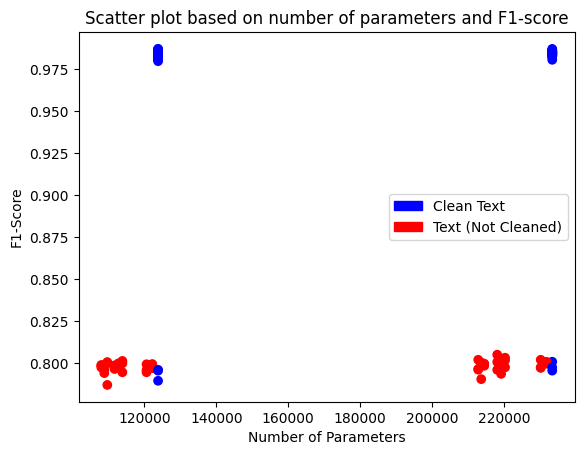

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Example data
rx = [model.count_params() for model, _, _ in r]
r2x = [model.count_params() for model, _, _ in r2]
ry = [metrics["classification_report"]["weighted avg"]['f1-score'] for _, _, metrics in r]
r2y = [metrics["classification_report"]["weighted avg"]['f1-score'] for _, _, metrics in r2]

# Combine the data
datax = rx + r2x
datay = ry + r2y

# Create a color list based on the array
colors = ['blue' if value in rx else 'red' for value in datax]

# Plot the data
plt.scatter(datax, datay, c=colors)

# Create legend handles
blue_patch = mpatches.Patch(color='blue', label='Clean Text')
red_patch = mpatches.Patch(color='red', label='Text (Not Cleaned)')

# Add legend to the plot
plt.legend(handles=[blue_patch, red_patch])

# Add labels and title
plt.xlabel('Number of Parameters')
plt.ylabel('F1-Score')
plt.title('Scatter plot based on number of parameters and F1-score')

# Show the plot
plt.show()

In [24]:
res = model_pass(r[0][1],make_model, X_sequence_train , y_train , X_sequence_test , y_test)

Model: "Model0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_112 (Embedding)       │ (None, 100, 100)       │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_112 (LSTM)                 │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,113 (852.00 KB)

 Trainable params: 218,113 (852.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 632ms/step - accuracy: 0.8324 - loss: 0.4970 - val_accuracy: 0.9193 - val_loss: 0.2547
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 588ms/step - accuracy: 0.9478 - loss: 0.1975 - val_accuracy: 0.9574 - val_loss: 0.1560
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.9832 - loss: 0.0902 - val_accuracy: 0.9731 - val_loss: 0.0971
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 541ms/step - accuracy: 0.9927 - loss: 0.0336 - val_accuracy: 0.9709 - val_loss: 0.0948
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 571ms/step - accuracy: 0.9959 - loss: 0.0189 - val_accuracy: 0.9709 - val_loss: 0.1022
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 575ms/step - accuracy: 0.9979 - loss: 0.0114 - val_accuracy: 0.9709 - val_loss: 0.1092
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 578ms/step - accuracy: 0.9979 - loss: 0.0091 - val_accuracy: 0.9776 - val_loss: 0.1087
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step


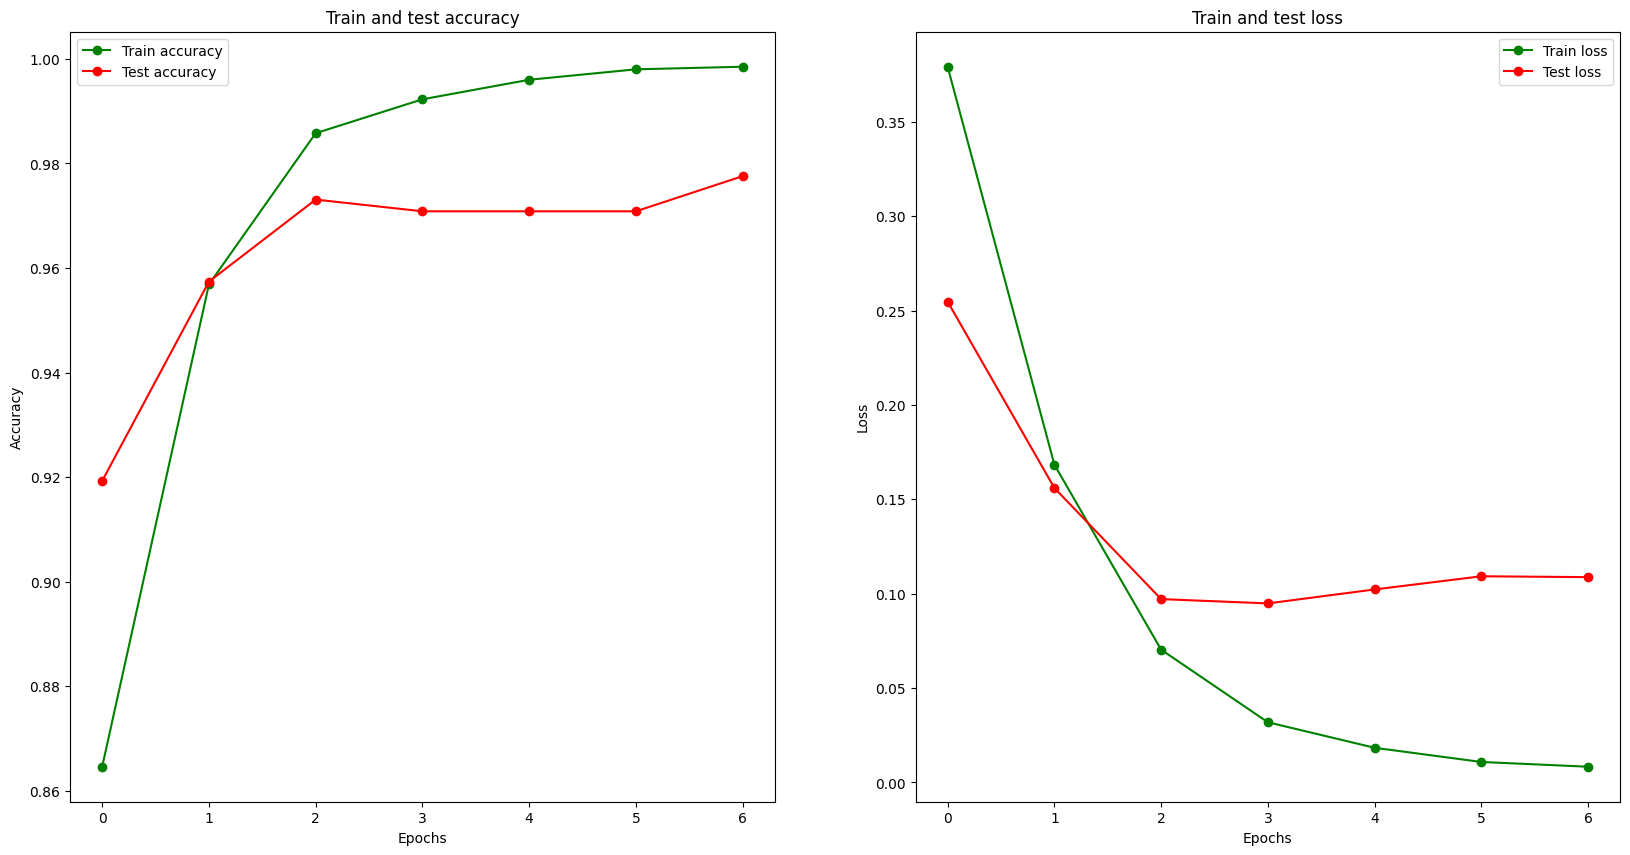

In [28]:
epochs = [i for i in range(7)]
history = res[1]["history"]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

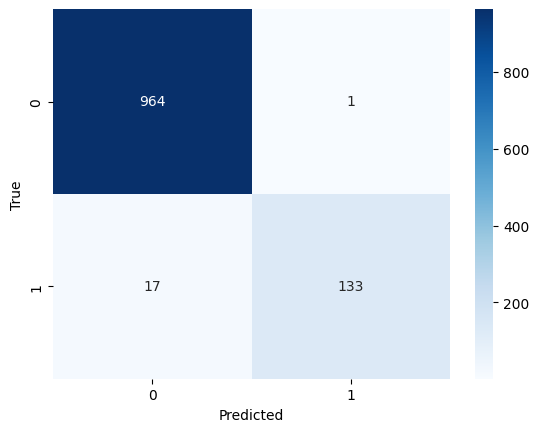

In [29]:
cm = res[1]["confusion_matrix"]

import seaborn as sns
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()